In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd

In [ ]:
(X_train, y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train[0].shape

(28, 28)

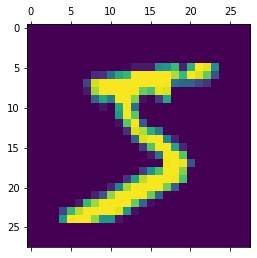

In [ ]:
plt.matshow(X_train[0]);

In [ ]:
y_train[0]

5

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [ ]:

X_test_flatten.shape, X_train_flatten.shape

((10000, 784), (60000, 784))

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4722 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9257


In [ ]:
model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2681 - accuracy: 0.9252


[0.26805809140205383, 0.9251999855041504]

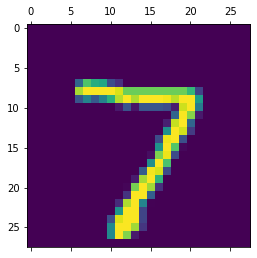

In [ ]:
plt.matshow(X_test[0])

In [ ]:
Y_test[0]

7

In [ ]:
predictions = model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [ ]:
predicted_labels = [np.argmax(i) for i in predictions]

In [ ]:
np.argmax(predictions[0])

7

### Build Confusionn Matrix Function

In [ ]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=predicted_labels)

In [ ]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   9,    9,  917,   18,    7,    3,   13,   10,   42,    4],
       [   4,    0,   18,  914,    0,   20,    4,   13,   31,    6],
       [   1,    1,    4,    0,  916,    0,   12,    4,   10,   34],
       [  11,    3,    1,   33,   10,  767,   17,    5,   38,    7],
       [  13,    3,    6,    1,    7,   10,  913,    2,    3,    0],
       [   1,    5,   23,    4,    7,    1,    0,  955,    5,   27],
       [   6,    7,    6,   16,    9,   20,    9,   12,  884,    5],
       [  10,    6,    1,    8,   30,    6,    0,   22,   13,  913]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

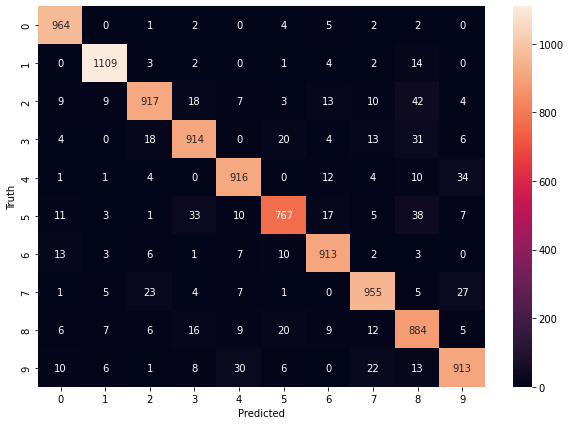

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')

In [ ]:
model_2 = keras.Sequential([
        keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model_2.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_2.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2678 - accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1214 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0853 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0502 - accuracy: 0.9846


In [ ]:
model_2.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0810 - accuracy: 0.9756


[0.08097579330205917, 0.975600004196167]

In [ ]:
predictions = model_2.predict(X_test_flatten)

313/313 [==============================] - 1s 3ms/step


In [ ]:
predicted_labels = [np.argmax(i) for i in predictions]

In [ ]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    1,    1,    0,    2,    0,    3,    2],
       [   0, 1126,    2,    1,    0,    0,    1,    0,    5,    0],
       [   4,    1, 1009,    0,    3,    0,    3,    5,    7,    0],
       [   0,    0,    4,  986,    2,    9,    1,    1,    3,    4],
       [   1,    0,    4,    1,  958,    1,    4,    3,    2,    8],
       [   2,    0,    0,    6,    2,  870,    3,    1,    4,    4],
       [   5,    3,    0,    1,    5,    4,  939,    0,    1,    0],
       [   0,    6,   12,    0,    0,    0,    0, 1001,    2,    7],
       [   4,    0,    7,    9,    5,    3,    6,    5,  932,    3],
       [   4,    5,    0,    6,   14,    4,    0,    9,    2,  965]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

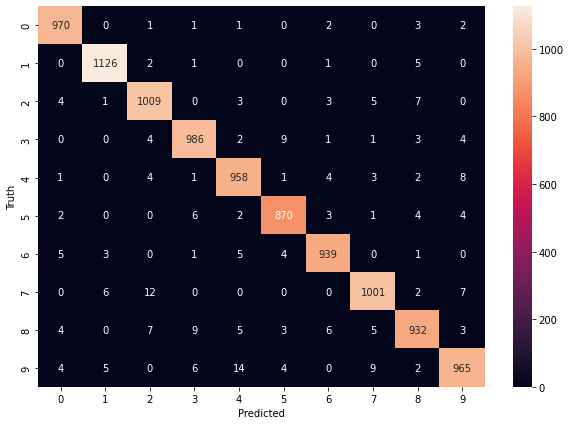

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')